In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotnine as p9

In [2]:
data_dir = '/Users/kotohatogami/Documents/GitHub/sta141b-proj/'
sf_crime = pd.read_csv(data_dir + "clean_data/sf_crime.csv")
sf_crime = sf_crime.drop(["Unnamed: 0"], axis= 1)

housing = pd.read_csv(data_dir + "clean_data/housing.csv")
housing = housing.drop(index=18)
housing.reset_index(inplace=True)

In [3]:
y = housing['mean_sale'].tolist()
x_violent = sm.add_constant(sf_crime["violent_rate"].tolist())
x_property = sm.add_constant(sf_crime["property_rate"].tolist())
x_total = sm.add_constant(sf_crime["total_rate"].tolist())

In [4]:
violent_regression = sm.OLS(y, x_violent).fit()
print(violent_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     5.847
Date:                Sun, 17 Mar 2024   Prob (F-statistic):             0.0271
Time:                        14:09:13   Log-Likelihood:                -265.94
No. Observations:                  19   AIC:                             535.9
Df Residuals:                      17   BIC:                             537.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -3.91e+05   6.49e+05     -0.602      0.5

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19


In [5]:
property_regression = sm.OLS(y, x_property).fit()
print(property_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     7.823
Date:                Sun, 17 Mar 2024   Prob (F-statistic):             0.0124
Time:                        14:09:13   Log-Likelihood:                -265.15
No. Observations:                  19   AIC:                             534.3
Df Residuals:                      17   BIC:                             536.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.54e+06   4.95e+05      5.134      0.0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19


In [6]:
property_regression = sm.OLS(y, x_total).fit()
print(property_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     5.471
Date:                Sun, 17 Mar 2024   Prob (F-statistic):             0.0318
Time:                        14:09:13   Log-Likelihood:                -266.10
No. Observations:                  19   AIC:                             536.2
Df Residuals:                      17   BIC:                             538.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.527e+06   5.85e+05      4.321      0.0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19


In [7]:
x = housing['mean_sale']

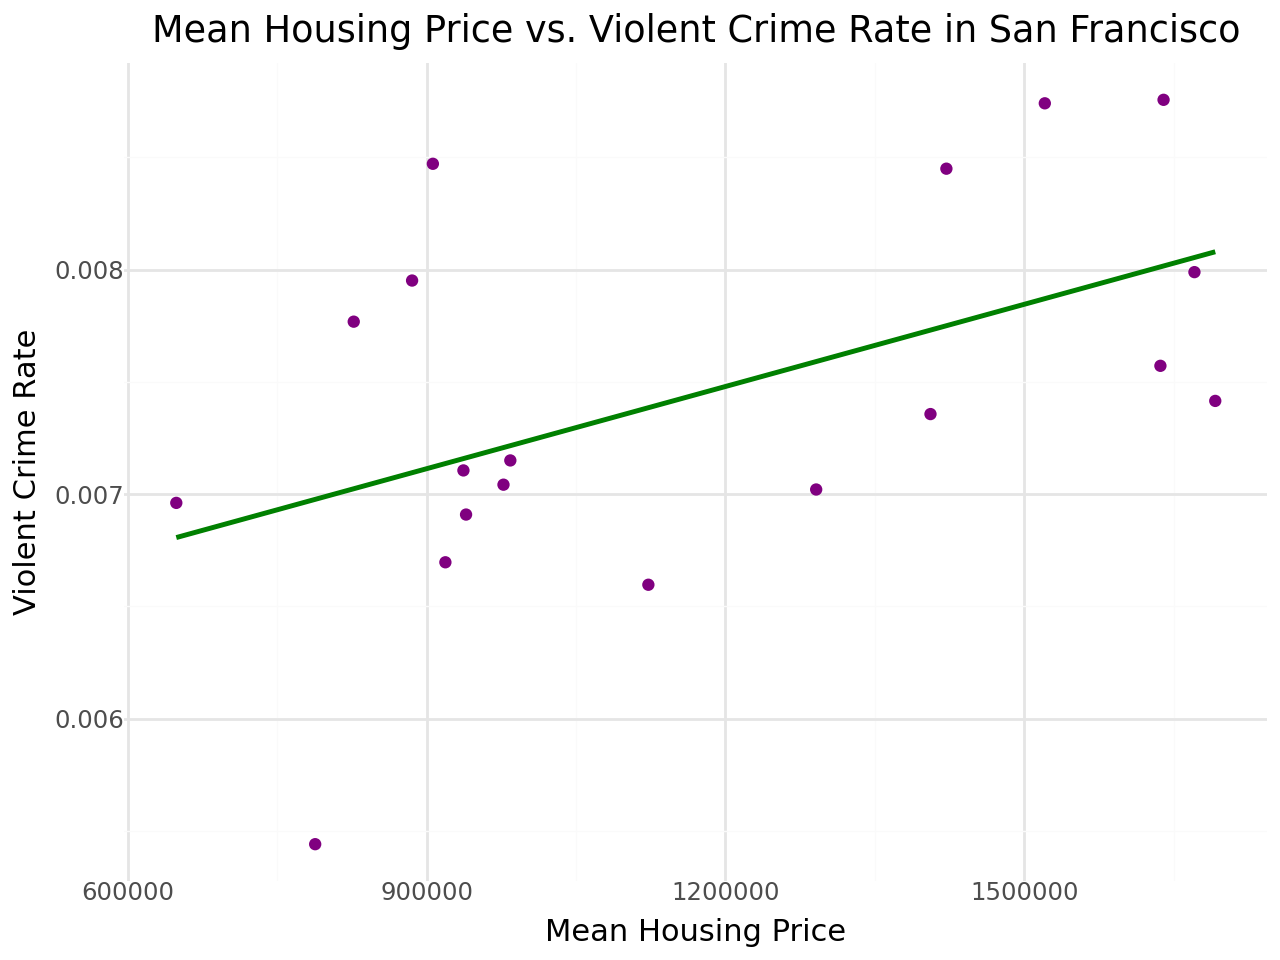

In [8]:
housing_violent = (
    p9.ggplot(sf_crime, p9.aes(x = x, y = "violent_rate")) + p9.geom_point(color = "purple")
    + p9.geom_smooth(method = "lm", se = False, color = "green") + p9.theme_minimal() +
    p9.labs(x = "Mean Housing Price",
            y = "Violent Crime Rate",
            title = "Mean Housing Price vs. Violent Crime Rate in San Francisco")
)
housing_violent

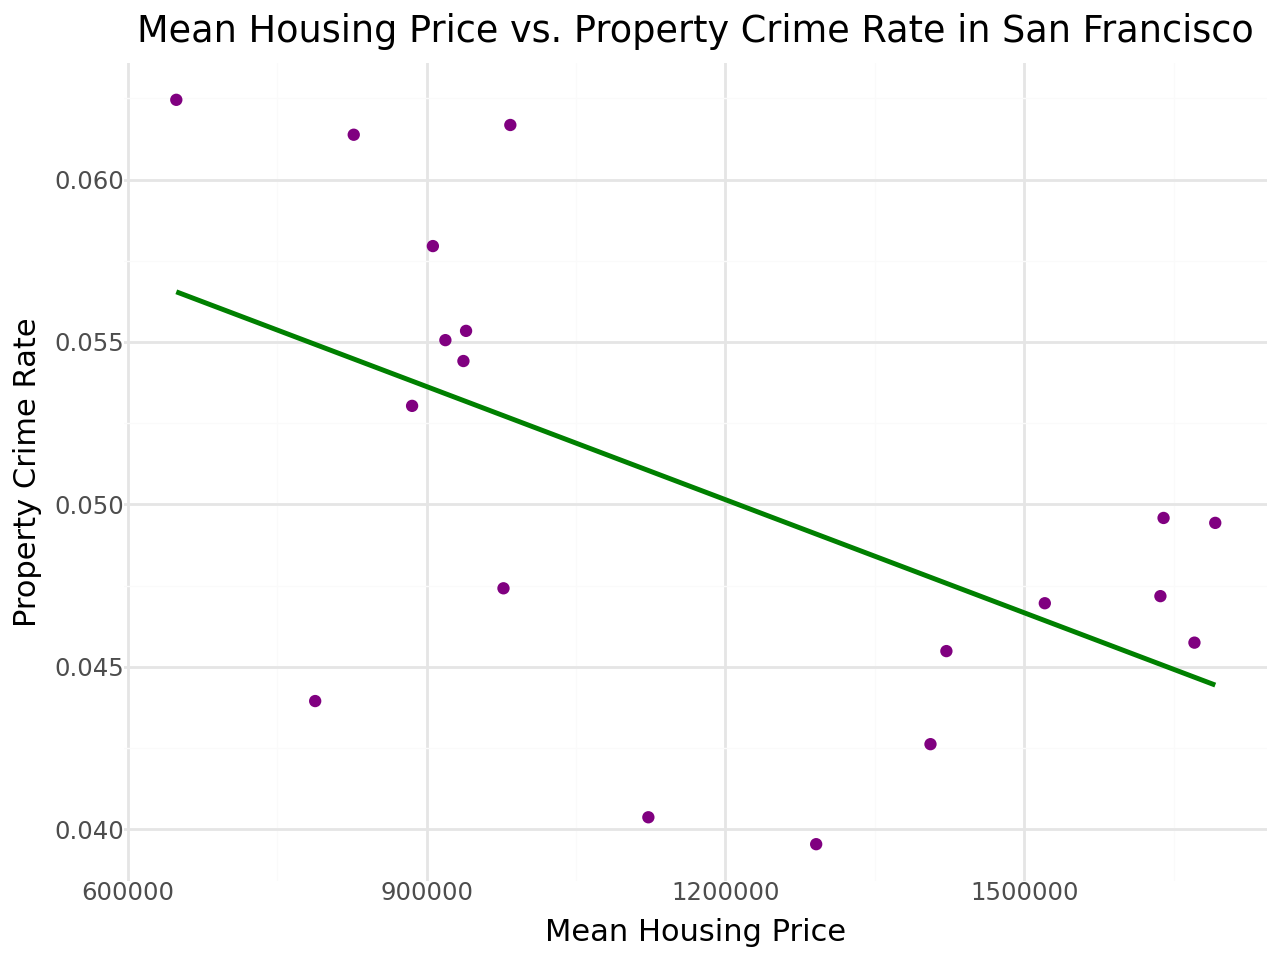

In [9]:
housing_property = (
    p9.ggplot(sf_crime, p9.aes(x = x, y = "property_rate")) + p9.geom_point(color = "purple")
    + p9.geom_smooth(method = "lm", se = False, color = "green") + p9.theme_minimal() +
    p9.labs(x = "Mean Housing Price",
            y = "Property Crime Rate",
            title = "Mean Housing Price vs. Property Crime Rate in San Francisco")
)
housing_property

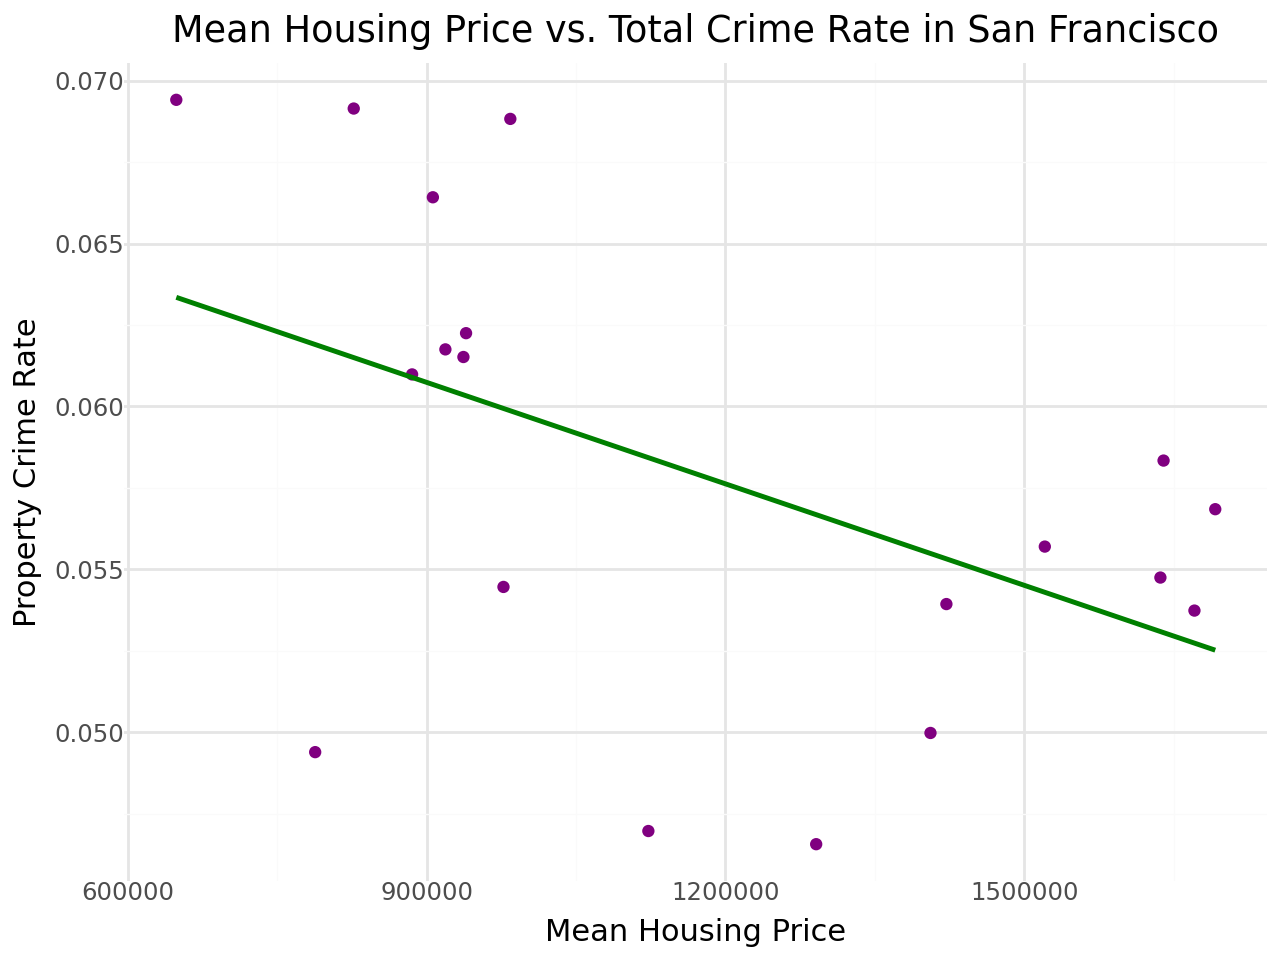

In [10]:
housing_total = (
    p9.ggplot(sf_crime, p9.aes(x = x, y = "total_rate")) + p9.geom_point(color = "purple")
    + p9.geom_smooth(method = "lm", se = False, color = "green") + p9.theme_minimal() +
    p9.labs(x = "Mean Housing Price",
            y = "Property Crime Rate",
            title = "Mean Housing Price vs. Total Crime Rate in San Francisco")
)
housing_total